In [810]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from ISLP import load_data


In [811]:
from sklearn.cluster import \
     (KMeans,
      AgglomerativeClustering)
from scipy.cluster.hierarchy import \
     (dendrogram,
      cut_tree)
from ISLP.cluster import compute_linkage


# Ex 7

In [812]:
USArrests = get_rdataset('USArrests').data
USArrests

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [813]:
scaler = StandardScaler(with_std=True,
                        with_mean=True)
USArrests_scaled = scaler.fit_transform(USArrests)

In [814]:
USArrests_scaled.shape

(50, 4)

In [815]:
from sklearn.metrics import pairwise_distances

pairwise_d = pairwise_distances(USArrests_scaled.T)

In [816]:
corr_d = np.corrcoef(USArrests_scaled, rowvar=False)
pairwise_d_sq = pairwise_d**2
proportionality = (1-corr_d) / ((pairwise_d)**2+0.001)

In [817]:
corr_d

array([[1.        , 0.80187331, 0.06957262, 0.56357883],
       [0.80187331, 1.        , 0.2588717 , 0.66524123],
       [0.06957262, 0.2588717 , 1.        , 0.41134124],
       [0.56357883, 0.66524123, 0.41134124, 1.        ]])

In [818]:
pairwise_d

array([[0.        , 4.45114242, 9.64586636, 6.60621803],
       [4.45114242, 0.        , 8.60888087, 5.78583417],
       [9.64586636, 8.60888087, 0.        , 7.67241008],
       [6.60621803, 5.78583417, 7.67241008, 0.        ]])

In [819]:
pd.DataFrame(proportionality)

,0,1,2,3
0,2.220446e-13,0.009999,9.999893e-03,0.01
1,9.999495e-03,0.000000,9.999865e-03,0.01
2,9.999893e-03,0.010000,2.220446e-13,0.01
3,9.999771e-03,0.010000,9.999830e-03,0.00


In [820]:
pd.DataFrame((1-corr_d))

,0,1,2,3
0,2.220446e-16,0.198127,9.304274e-01,0.436421
1,1.981267e-01,0.000000,7.411283e-01,0.334759
2,9.304274e-01,0.741128,2.220446e-16,0.588659
3,4.364212e-01,0.334759,5.886588e-01,0.000000


In [821]:
pd.DataFrame((pairwise_d**2))

,0,1,2,3
0,0.000000,19.812669,93.042738,43.642117
1,19.812669,0.000000,74.112830,33.475877
2,93.042738,74.112830,0.000000,58.865876
3,43.642117,33.475877,58.865876,0.000000


In [822]:
pd.DataFrame((pairwise_d**2)/(1-corr_d))

/var/folders/0x/ssh0vq194tdf2r_zhp6kqr0r0000gn/T/ipykernel_18752/2998869761.py:1: RuntimeWarning:

invalid value encountered in divide



,0,1,2,3
0,0.0,100.0,100.0,100.0
1,100.0,NaN,100.0,100.0
2,100.0,100.0,0.0,100.0
3,100.0,100.0,100.0,NaN


# Exercise 8

In [823]:
pca = PCA()

In [824]:
pca.fit(USArrests_scaled)
scores = pca.transform(USArrests_scaled)

In [825]:
[x for x in pca.explained_variance_ratio_]

[0.6200603947873733,
 0.2474412881349604,
 0.08914079514520751,
 0.04335752193245878]

In [826]:
sum = USArrests_scaled.sum(axis=1)
sum.shape, sum

((50,),
 array([ 1.51632013,  2.9164354 ,  3.62876599, -0.80336612,  5.42232344,
         3.18233366, -2.07032695,  0.24214554,  5.91585316,  2.82305441,
        -0.98208715, -3.38223612,  3.07116039, -0.89919857, -4.35416289,
        -1.40702542, -1.7819923 ,  2.85027717, -4.84627641,  3.191305  ,
        -0.22337182,  4.10719683, -3.0279213 ,  1.04849099,  1.43159142,
        -2.55954357, -2.39979559,  5.75808683, -4.62914905,  1.14238625,
         3.70579045,  3.72995782,  1.23691494, -6.15081927, -0.05014661,
        -0.47623531,  0.15966734, -1.36214676, -0.87548242,  1.75817382,
        -4.29511929,  1.61902731,  2.97518235, -0.49033115, -6.20659622,
        -0.24841306, -0.13437027, -4.71126081, -3.72359638, -1.34146984]))

In [827]:
scores.shape

(50, 4)

In [828]:
pca_nr = 1
pve_up = (scores**2).sum(axis=0)
pve_down = (USArrests_scaled**2).sum(axis=0).sum()
pve_up/pve_down

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [829]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

# Exercise 9

In [830]:
hclust = AgglomerativeClustering

In [831]:
hc_comp = hclust(distance_threshold=0,
                 n_clusters=None,
                 linkage='complete')
hc_comp.fit(USArrests)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [32.5, 32.5, 62.5, 62.5],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [130.0, 130.0, 150.0, 150.0],
  [115.0, 115.0, 140.0, 140.0],
  [92.5, 92.5, 127.5, 127.5],
  [47.5, 47.5, 110.0, 110.0],
  [10.0, 10.0, 78.75, 78.75],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [172.5, 172.5, 202.5, 202.5],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [235.0, 235.0, 252.5, 252.5],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [243.75, 243.75, 282.5, 282.5],
  [225.0, 225.0, 263.125, 263.125],
  [187.5, 187.5, 244.0625, 244.0625],
  [305.0, 305.0, 315.0, 315.0],
  [325.0, 325.0, 335.0, 335.0],
  [310.0, 310.0, 330.0, 330.0],
  [355.0, 355.0, 365.0

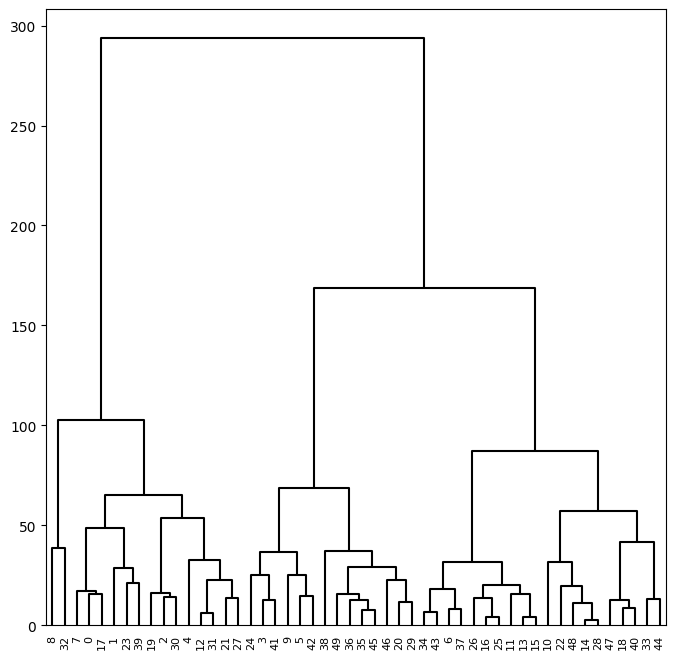

In [832]:
cargs = {'color_threshold':-np.inf,
         'above_threshold_color':'black'}
linkage_comp = compute_linkage(hc_comp)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp,
           ax=ax,
           **cargs)

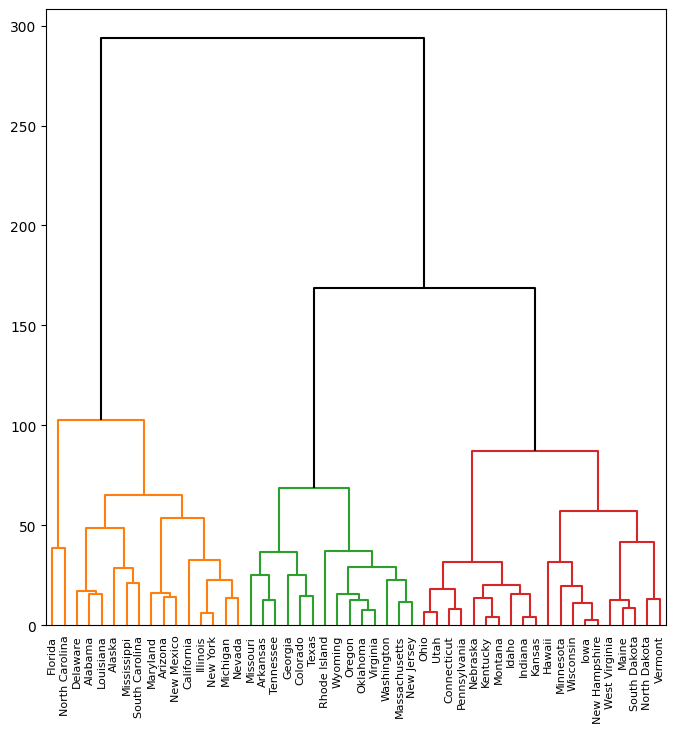

In [833]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ddata1 = dendrogram(linkage_comp,
           ax=ax,
           color_threshold=120,
           above_threshold_color='black',
           labels=USArrests.index)

In [834]:
hc_comp_scaled = hclust(distance_threshold=0,
                 n_clusters=None,
                 linkage='complete')
hc_comp_scaled.fit(USArrests_scaled)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

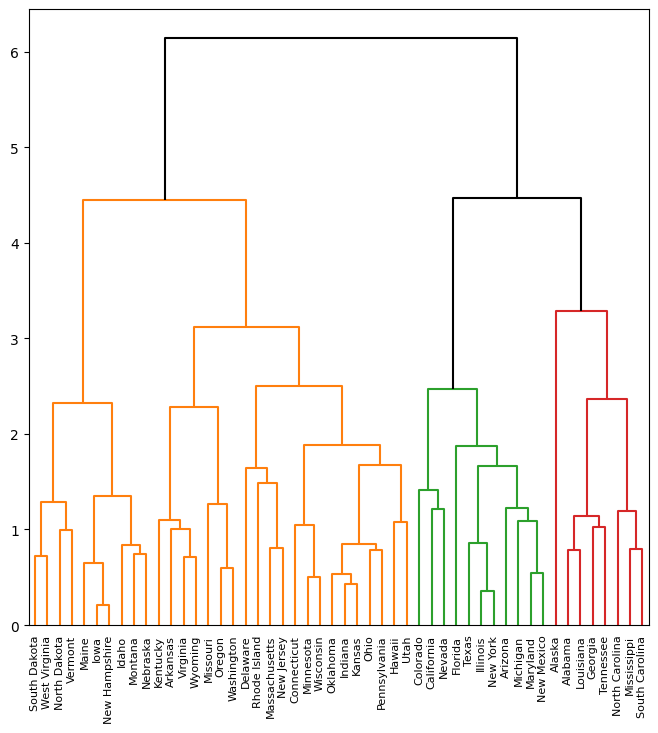

In [835]:
linkage_comp = compute_linkage(hc_comp_scaled)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ddata = dendrogram(linkage_comp,
           ax=ax,
           color_threshold=4.45,
           above_threshold_color='black',
           labels=USArrests.index)

In [836]:
import json
values = ddata.items()

# for what in values:
#     print(what)

len(values.mapping['leaves_color_list'])
list_st = np.array(values.mapping['leaves_color_list'], dtype=str)
list_st

array(['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1',
       'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1',
       'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C2', 'C2',
       'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C3', 'C3',
       'C3', 'C3', 'C3', 'C3', 'C3', 'C3'], dtype='<U2')

In [837]:
import plotly.express as px
import pandas as pd

states = ['South Dakota', 'West Virginia', 'North Dakota', 'Vermont',
          'Maine', 'Iowa', 'New Hampshire', 'Idaho', 'Montana', 'Nebraska',
          'Kentucky', 'Arkansas', 'Virginia', 'Wyoming', 'Missouri',
          'Oregon', 'Washington', 'Delaware', 'Rhode Island',
          'Massachusetts', 'New Jersey', 'Connecticut', 'Minnesota',
          'Wisconsin', 'Oklahoma', 'Indiana', 'Kansas', 'Ohio',
          'Pennsylvania', 'Hawaii', 'Utah', 'Colorado', 'California',
          'Nevada', 'Florida', 'Texas', 'Illinois', 'New York', 'Arizona',
          'Michigan', 'Maryland', 'New Mexico', 'Alaska', 'Alabama',
          'Louisiana', 'Georgia', 'Tennessee', 'North Carolina',
          'Mississippi', 'South Carolina']

clusters = ['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1',
       'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1',
       'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C2', 'C2',
       'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C3', 'C3',
       'C3', 'C3', 'C3', 'C3', 'C3', 'C3']

state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 
    'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 
    'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 
    'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Sample data: Replace this with your actual state and cluster data
data = {
    'state': states,
    'cluster': values.mapping['leaves_color_list']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a color map
color_map = {'C1': 'orange', 'C2': 'green', 'C3': 'red'}

# # Add color to the DataFrame
# df['color'] = df['cluster'].map(color_map)

# Map state names to abbreviations
df['state_abbrev'] = df['state'].map(state_abbrev)

# Plotting the map
fig = px.choropleth(df, 
                    locations='state_abbrev', 
                    locationmode='USA-states', 
                    color='cluster',
                    color_discrete_map=color_map,
                    scope='usa',
                    title='US States Clustering')

# Update layout for better visuals
fig.update_layout(
    geo=dict(
        lakecolor='rgb(255, 255, 255)',
    )
)

# Show the figure
fig.show()


In [838]:
import plotly.express as px
import pandas as pd

states = ['South Dakota', 'West Virginia', 'North Dakota', 'Vermont',
          'Maine', 'Iowa', 'New Hampshire', 'Idaho', 'Montana', 'Nebraska',
          'Kentucky', 'Arkansas', 'Virginia', 'Wyoming', 'Missouri',
          'Oregon', 'Washington', 'Delaware', 'Rhode Island',
          'Massachusetts', 'New Jersey', 'Connecticut', 'Minnesota',
          'Wisconsin', 'Oklahoma', 'Indiana', 'Kansas', 'Ohio',
          'Pennsylvania', 'Hawaii', 'Utah', 'Colorado', 'California',
          'Nevada', 'Florida', 'Texas', 'Illinois', 'New York', 'Arizona',
          'Michigan', 'Maryland', 'New Mexico', 'Alaska', 'Alabama',
          'Louisiana', 'Georgia', 'Tennessee', 'North Carolina',
          'Mississippi', 'South Carolina']

clusters = ddata1.items().mapping['leaves_color_list']

state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 
    'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 
    'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 
    'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Sample data: Replace this with your actual state and cluster data
data = {
    'state': states,
    'cluster': clusters
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a color map
color_map = {'C1': 'red', 'C2': 'orange', 'C3': 'green'}

# # Add color to the DataFrame
# df['color'] = df['cluster'].map(color_map)

# Map state names to abbreviations
df['state_abbrev'] = df['state'].map(state_abbrev)

# Plotting the map
fig = px.choropleth(df, 
                    locations='state_abbrev', 
                    locationmode='USA-states', 
                    color='cluster',
                    color_discrete_map=color_map,
                    scope='usa',
                    title='US States Clustering')

# Update layout for better visuals
fig.update_layout(
    geo=dict(
        lakecolor='rgb(255, 255, 255)',
    )
)

# Show the figure
fig.show()


# Exercise 10

In [839]:
predictors = []
for j in range(50):
    predictors.append(f'i{j+1}')

predictors

df = pd.DataFrame(columns=predictors)

rng = np.random.default_rng(10)
N = len(predictors)

for i in range(60):
    if (i)%20 == 0:
        offset = rng.choice(np.arange(5, 10), N, replace=True)

    new_row = np.array([np.random.normal(loc=x) for x in offset])
    # print(offset)
    df.loc[len(df.index)] = new_row

group = np.concatenate((np.repeat(1,20), np.repeat(2,20), np.repeat(3,20)))
df.loc[19:22]

,i1,i2,i3,i4,i5,i6,i7,i8,i9,i10,...,i41,i42,i43,i44,i45,i46,i47,i48,i49,i50
19,7.506057,8.463671,5.816424,6.908130,8.557179,8.026578,6.732179,3.848870,8.819400,7.777741,...,7.060880,5.770010,5.451429,7.240337,5.089624,5.574099,5.251940,8.486678,6.499713,8.581162
20,8.165588,5.571715,7.949497,5.788718,7.640728,7.963474,4.826977,4.956500,8.604626,9.919182,...,6.163625,6.315771,5.837270,7.234096,10.129823,5.645942,7.418565,8.595196,7.603331,5.944024
21,6.996028,4.972005,7.244908,7.074716,8.592149,8.497600,4.383189,6.457873,9.216366,9.148438,...,6.302671,4.724075,6.705243,6.473915,5.812839,6.067332,6.752533,7.480112,7.257097,4.987715
22,8.596727,5.343148,7.066918,5.423482,8.517058,8.643348,5.857370,4.634340,7.498704,7.239053,...,8.168878,7.188878,6.413544,6.358408,9.361721,6.815576,7.546932,7.752516,8.575275,6.160871


In [840]:
pca = PCA()
pca.fit(df)
scores = pca.transform(df)
scores.shape

(60, 50)

Text(0, 0.5, 'PC2')

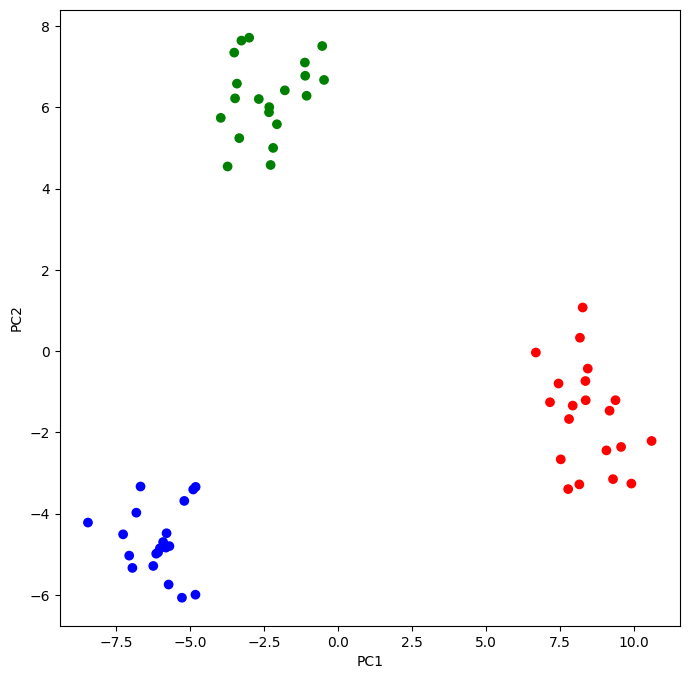

In [841]:
# Define colors for each group
color_map = {1: 'red', 2: 'green', 3: 'blue'}
colors = [color_map[gp] for gp in group]

i, j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1], c=colors)
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))


In [842]:
kmeans = KMeans(n_clusters=4,
                random_state=2,
                n_init=20).fit(df)

In [843]:
pd.crosstab(pd.Series(group, name="group"), pd.Series(kmeans.labels_, name='kmeans'))

kmeans,0,1,2,3
group,,,,
1,0,8,0,12
2,20,0,0,0
3,0,0,20,0


In [844]:
df_pca = pd.DataFrame()
df_pca['pc1'] = scores[:,0]
df_pca['pc2'] = scores[:,1]
df_pca.shape

(60, 2)

In [845]:
kmeans_pca = KMeans(n_clusters=3,
                random_state=2,
                n_init=20).fit(df_pca)

In [846]:
pd.crosstab(pd.Series(group, name="group"), pd.Series(kmeans_pca.labels_, name='kmeans_pca'))

kmeans_pca,0,1,2
group,,,
1,0,20,0
2,0,0,20
3,20,0,0


In [847]:
scaler = StandardScaler(with_std=True,
                        with_mean=True)
# scaler.scale_ = np.repeat(0.1,50)
df_scaled = scaler.fit_transform(df)

In [848]:
pca = PCA()
pca.fit(df_scaled)
scores = pca.transform(df_scaled)
scores.shape

(60, 50)

Text(0, 0.5, 'PC2')

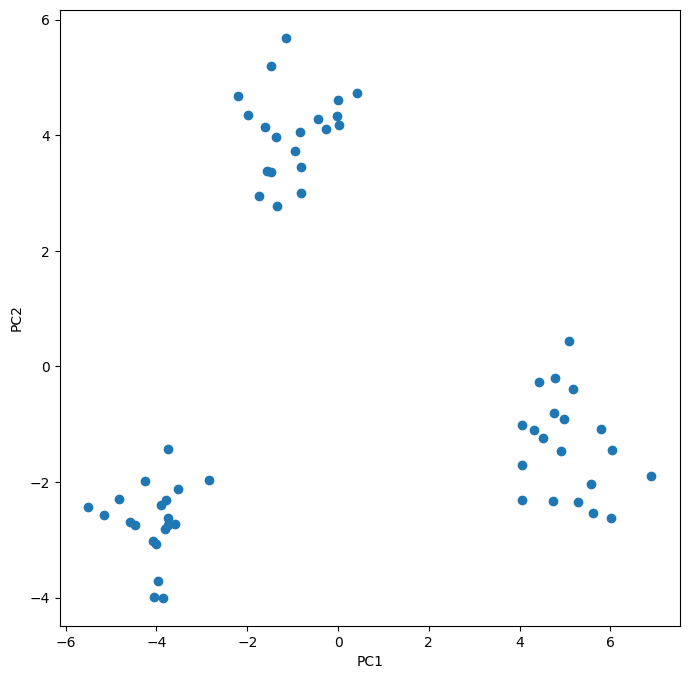

In [849]:
i, j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))

In [850]:
kmeans_scaled = KMeans(n_clusters=3,
                random_state=2,
                n_init=20).fit(df_scaled)

In [851]:
pd.crosstab(pd.Series(group, name="group"), pd.Series(kmeans_scaled.labels_, name='kmeans_scaled'))

kmeans_scaled,0,1,2
group,,,
1,0,20,0
2,0,0,20
3,20,0,0


In [852]:
df[10:30]

,i1,i2,i3,i4,i5,i6,i7,i8,i9,i10,...,i41,i42,i43,i44,i45,i46,i47,i48,i49,i50
10,8.712999,9.412772,5.688119,6.433327,8.511733,7.921181,7.123087,3.719889,9.616215,7.298325,...,7.920081,5.397928,7.821117,8.096789,7.949909,7.057214,5.368487,9.447059,5.354287,6.719346
11,6.360634,8.664996,5.241101,6.410194,7.975677,9.144519,7.624077,6.063451,10.263643,5.485399,...,9.171566,6.630324,7.882969,10.948977,8.579722,6.310835,6.064067,7.632456,6.923696,4.789828
12,6.090075,9.142293,4.718285,6.723322,7.931308,8.422392,7.544365,5.226247,8.672284,6.991891,...,6.730315,5.248026,5.584349,9.173114,8.150732,8.651711,4.607421,9.799180,5.992630,8.269456
13,7.218148,8.946298,5.916033,5.224751,10.091271,7.693957,6.014529,4.978755,9.070569,6.763100,...,7.142503,6.286601,6.842158,8.855712,6.258930,7.542104,6.952829,8.565566,5.856657,6.224481
14,7.021896,9.715996,6.741302,6.707453,9.037569,8.934458,6.781105,3.002377,7.818017,6.558954,...,6.688833,8.599805,6.655126,7.846287,8.533932,7.707485,6.190131,9.301824,7.569487,4.342657
15,7.362975,10.314232,5.210174,6.742689,10.378203,9.103637,6.936388,6.271704,9.869259,6.535148,...,7.170486,2.984940,6.182319,8.277504,9.105471,5.440927,4.029377,8.903290,3.869687,6.718337
16,7.405107,7.745276,5.209245,6.857333,7.989235,8.928826,6.491648,3.648482,8.967486,6.399959,...,8.170121,3.073769,7.741454,7.076504,8.971366,7.812555,4.692994,8.314042,5.665002,7.524255
17,7.789233,9.421355,6.026972,5.274091,8.075485,9.003570,7.536385,6.228401,8.414768,9.534213,...,5.659050,8.230008,5.631759,8.427011,9.313853,5.453550,4.942950,9.435078,5.024799,7.869988
18,7.584727,8.925913,6.313144,5.201076,7.142034,10.744040,6.899991,4.397781,11.103882,7.528516,...,8.537858,6.890370,7.396424,8.468523,9.727240,6.920978,4.796065,7.937293,6.510683,8.221190
19,7.506057,8.463671,5.816424,6.908130,8.557179,8.026578,6.732179,3.848870,8.819400,7.777741,...,7.060880,5.770010,5.451429,7.240337,5.089624,5.574099,5.251940,8.486678,6.499713,8.581162


In [853]:
df2 = pd.DataFrame(df_scaled[10:30])
df2.mean(axis=1)

0     0.021439
1     0.160283
2     0.030547
3     0.029730
4     0.160345
5     0.087429
6     0.172088
7     0.109319
8     0.309218
9    -0.058519
10   -0.347318
11   -0.216379
12   -0.336855
13   -0.183871
14   -0.182978
15   -0.251194
16   -0.415899
17   -0.174601
18   -0.185992
19   -0.427793
dtype: float64

# Exercise 11

In [854]:
def low_rank(X, M=1):
    U, D, V = np.linalg.svd(X)
    L = U[:,:M] * D[None,:M]
    return L.dot(V[:M])

In [855]:
def alg121(Xna, M, r_idx, c_idx, max_iter=15, print_progress=True):
    # Step 1
    Xhat = Xna.copy()
    Xbar = np.nanmean(Xhat, axis=0)
    Xhat[r_idx, c_idx] = Xbar[c_idx]
    # Step 2
    thresh = 1e-7
    rel_err = 1
    count = 0
    ismiss = np.isnan(Xna)
    mssold = np.mean(Xhat[~ismiss]**2)
    mss0 = np.mean(Xna[~ismiss]**2)
    mssold, mss0
    mss_return = 0
    Xapp_return = []
    while rel_err > thresh and count <= max_iter:
        count += 1
        # Step 2(a)
        Xapp = low_rank(Xhat, M)
        Xapp_return.append(Xapp)
        # Step 2(b)
        Xhat[ismiss] = Xapp[ismiss]
        # Step 2(c)
        mss = np.mean(((Xna - Xapp)[~ismiss])**2)
        rel_err = (mssold - mss) / mss0
        mssold = mss
        mss_return = mss
        if print_progress:
            print("Iteration: {0}, MSS:{1:.3f}, Rel.Err {2:.2e}"
            .format(count, mss, rel_err))

    return mss, Xapp_return[-1]

In [896]:
boston_df = load_data('Boston')
boston_scaled = scaler.fit_transform(boston_df)
boston_scaled.shape

(506, 13)

In [897]:
import math 
# NOT missing elements mss!!!!
m_list = []
for nr_m_comp in range(1,9,1):
    it_list = []
    for it in range(20):
        array_with_indices_r = np.arange(boston_scaled.shape[0])
        array_with_indices_c = np.arange(boston_scaled.shape[1])
        r_idx = []
        c_idx = []
        perc_list = []
        for percentage_missing in [5,5,5,5,5,5]:
            n_omit = math.floor((percentage_missing/100)*boston_scaled.shape[0])
            # r_idx.append(np.random.choice(array_with_indices_r,
            #              n_omit,
            #              replace=False)[0])
            # c_idx.append(np.random.choice(array_with_indices_c,
            #              n_omit,
            #              replace=True)[0])
            r_idx = r_idx + list(np.random.choice(array_with_indices_r,
                         n_omit,
                         replace=False))
            c_idx = c_idx + list(np.random.choice(array_with_indices_c,
                         n_omit,
                         replace=True))
            
            Xna = boston_scaled.copy()
            r_idx = np.array(r_idx)
            c_idx = np.array(c_idx)
            Xna[r_idx, c_idx] = np.nan
            r_idx = list(r_idx)
            c_idx = list(c_idx)
            array_with_indices_r = np.setdiff1d(array_with_indices_r, r_idx)
            # array_with_indices_c = np.setdiff1d(array_with_indices_c, c_idx)
            _, Xapp = alg121(Xna=Xna, M=nr_m_comp, r_idx=r_idx, c_idx=c_idx, max_iter=30, print_progress=False)
            Xapp = Xapp[r_idx,c_idx].flatten()
            Xactual = boston_scaled[r_idx,c_idx].flatten()
            mss = ((Xactual - Xapp)**2).sum()
            perc_list.append(mss)
        it_list.append(perc_list)

    m_list.append(it_list)


In [898]:
m_list = np.array(m_list)

In [899]:
m_list = np.array([np.array(x) for x in m_list])

In [900]:
new_m_list = []
for l in m_list:
    l = np.array([np.array(x) for x in l])
    new_m_list.append(l)

new_m_list = np.array(new_m_list)

In [901]:
new_m_list.shape

(8, 20, 6)

In [902]:
mean_arr = new_m_list.mean(axis=1)
mean_arr.shape

(8, 6)

In [903]:
pd.DataFrame(mean_arr)

,0,1,2,3,4,5
0,17.440130,30.044692,42.966386,57.230227,73.854771,89.939285
1,16.404171,29.120550,42.748718,55.015171,69.433857,80.651042
2,14.277028,26.636977,39.785532,52.603681,65.194024,79.367281
3,25.753449,48.198548,68.553058,85.399279,101.382073,123.593596
4,30.482236,58.681461,82.798420,99.254280,116.386923,132.066890
5,17.471587,36.560014,61.265909,78.630898,99.824805,122.411827
6,18.467600,36.312099,58.902902,81.384681,102.433973,121.280597
7,26.424623,50.183896,67.948961,92.910543,110.417210,136.651347


In [904]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
index = np.array([2, 3, 6, 10, 15, 16])

new_a = np.setdiff1d(a, index)

new_a

array([1, 4, 5, 7, 8, 9])

In [905]:
for it in range(10):
        array_with_indices_r = np.arange(10)
        array_with_indices_c = np.arange(10)
        r_idx = []
        c_idx = []
        perc_list = []
        for percentage_missing in [10,10,10,10,10,10]:
            n_omit = math.floor((percentage_missing/100)*10)
            r_idx.append(np.random.choice(array_with_indices_r,
                         n_omit,
                         replace=False)[0])
            c_idx.append(np.random.choice(array_with_indices_c,
                         n_omit,
                         replace=True)[0])
            print(array_with_indices_c, c_idx)
            array_with_indices_r = np.setdiff1d(array_with_indices_r, r_idx)
            # array_with_indices_c = np.setdiff1d(array_with_indices_c, c_idx)

[0 1 2 3 4 5 6 7 8 9] [0]
[0 1 2 3 4 5 6 7 8 9] [0, 9]
[0 1 2 3 4 5 6 7 8 9] [0, 9, 0]
[0 1 2 3 4 5 6 7 8 9] [0, 9, 0, 6]
[0 1 2 3 4 5 6 7 8 9] [0, 9, 0, 6, 3]
[0 1 2 3 4 5 6 7 8 9] [0, 9, 0, 6, 3, 6]
[0 1 2 3 4 5 6 7 8 9] [5]
[0 1 2 3 4 5 6 7 8 9] [5, 3]
[0 1 2 3 4 5 6 7 8 9] [5, 3, 8]
[0 1 2 3 4 5 6 7 8 9] [5, 3, 8, 1]
[0 1 2 3 4 5 6 7 8 9] [5, 3, 8, 1, 4]
[0 1 2 3 4 5 6 7 8 9] [5, 3, 8, 1, 4, 7]
[0 1 2 3 4 5 6 7 8 9] [8]
[0 1 2 3 4 5 6 7 8 9] [8, 5]
[0 1 2 3 4 5 6 7 8 9] [8, 5, 5]
[0 1 2 3 4 5 6 7 8 9] [8, 5, 5, 3]
[0 1 2 3 4 5 6 7 8 9] [8, 5, 5, 3, 4]
[0 1 2 3 4 5 6 7 8 9] [8, 5, 5, 3, 4, 7]
[0 1 2 3 4 5 6 7 8 9] [7]
[0 1 2 3 4 5 6 7 8 9] [7, 8]
[0 1 2 3 4 5 6 7 8 9] [7, 8, 8]
[0 1 2 3 4 5 6 7 8 9] [7, 8, 8, 4]
[0 1 2 3 4 5 6 7 8 9] [7, 8, 8, 4, 6]
[0 1 2 3 4 5 6 7 8 9] [7, 8, 8, 4, 6, 1]
[0 1 2 3 4 5 6 7 8 9] [2]
[0 1 2 3 4 5 6 7 8 9] [2, 1]
[0 1 2 3 4 5 6 7 8 9] [2, 1, 5]
[0 1 2 3 4 5 6 7 8 9] [2, 1, 5, 4]
[0 1 2 3 4 5 6 7 8 9] [2, 1, 5, 4, 3]
[0 1 2 3 4 5 6 7 8 9] [2, 1, 5, 4, 3

In [906]:
x = np.array([[[1,2,3,4],[5,6,7,8], [9,10,11,12]], [[13,14, 15, 16],[17, 18, 19, 20], [21, 22, 23, 24]]])
x.shape
x.mean(axis=1)
# y = x.mean(axis=0)
# y.shape

array([[ 5.,  6.,  7.,  8.],
       [17., 18., 19., 20.]])

In [907]:
n_omit = 20
r_idx = np.random.choice(np.arange(boston_scaled.shape[0]),
                         n_omit,
                         replace=False)
c_idx = np.random.choice(np.arange(boston_scaled.shape[1]),
                        n_omit,
                        replace=True)

Xna = boston_scaled.copy()
Xna[r_idx,c_idx] = np.nan

_, Xapp = alg121(Xna, 1, r_idx, c_idx, print_progress=False)
Xapp.shape

(506, 13)

# Exercise 13

In [1010]:
gene_df = pd.read_csv('Ch12Ex13.csv')
gene_df.shape

(999, 40)

In [1011]:
gene_df = gene_df.T
gene_df.index = np.arange(40)

In [1012]:
gene_df

,0,1,2,3,4,5,6,7,8,9,...,989,990,991,992,993,994,995,996,997,998
0,-0.292526,0.258788,-1.152132,0.195783,0.030124,0.085418,1.116610,-1.218857,1.267369,-0.744782,...,1.325041,-0.116171,-1.470146,-0.379272,-1.465006,1.075148,-1.226125,-3.056328,1.450658,0.717977
1,-1.139267,-0.972845,-2.213168,0.593306,-0.691014,-1.113054,1.341700,-1.277279,-0.918349,0.796082,...,0.740838,-0.162392,-0.633375,-0.895521,2.034465,3.003267,-0.501702,0.449889,1.310348,0.763482
2,0.195837,0.588486,-0.861525,0.282992,-0.403426,-0.677969,0.103278,-0.558925,-1.253500,0.578544,...,-0.435533,-0.235912,1.446660,-1.127459,0.440849,-0.123441,-0.717430,1.880362,0.383837,0.313576
3,-1.281121,-0.800258,0.630925,0.247147,-0.729859,-0.562929,0.390963,-1.344493,-1.067114,-1.128211,...,-3.065529,1.597294,0.737478,-0.631248,-0.530442,-1.036740,-0.169113,-0.742841,-0.408860,-0.326473
4,-0.251439,-1.820398,0.951772,1.978668,-0.364099,0.938194,-1.927491,1.159115,-0.240638,-1.070943,...,-2.378938,-0.086946,-0.122342,1.418029,1.075337,-1.270604,0.599530,2.238346,-0.471111,-0.158700
5,2.511997,-2.058924,-1.165724,-0.871018,1.125349,0.118809,0.451692,-1.501044,1.163889,-0.406788,...,0.101693,1.019600,-0.553600,0.731371,0.298128,-1.277029,-0.997987,-0.291738,-1.392396,0.468113
6,-0.922206,-0.064764,-0.391559,-0.989715,-1.404041,-2.192225,-1.345070,-0.554120,0.565089,1.423884,...,0.263076,0.583638,1.779488,0.636580,2.515097,-0.278504,0.028236,1.270233,-0.805808,0.519161
7,0.059543,1.592124,1.063619,-1.032253,-0.806130,0.685073,0.625336,0.691499,0.949329,0.582569,...,-0.603931,-0.581503,-0.346134,-0.083600,0.191902,1.249723,0.200508,0.696415,0.210900,-0.427099
8,-1.409645,-0.173117,-0.350009,-1.109654,-1.237924,0.262304,0.816305,-0.881673,2.372266,0.438686,...,-0.427227,-0.127644,1.196953,1.078757,0.325376,-0.706994,-1.364865,1.242857,1.727079,2.759068
9,-0.656712,-0.121087,-1.489058,-0.385142,0.577602,-1.229459,-0.358081,0.454120,1.706587,-1.481767,...,-0.205602,-0.105960,-0.181468,-0.539269,0.790791,-0.704671,0.564957,0.429148,0.862870,-2.571514


In [1013]:
gene_scaled = scaler.fit_transform(gene_df)

In [1014]:
hc_comp = hclust(distance_threshold=0,
                 n_clusters=None,
                 linkage='complete')
hc_comp.fit(gene_scaled)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2']


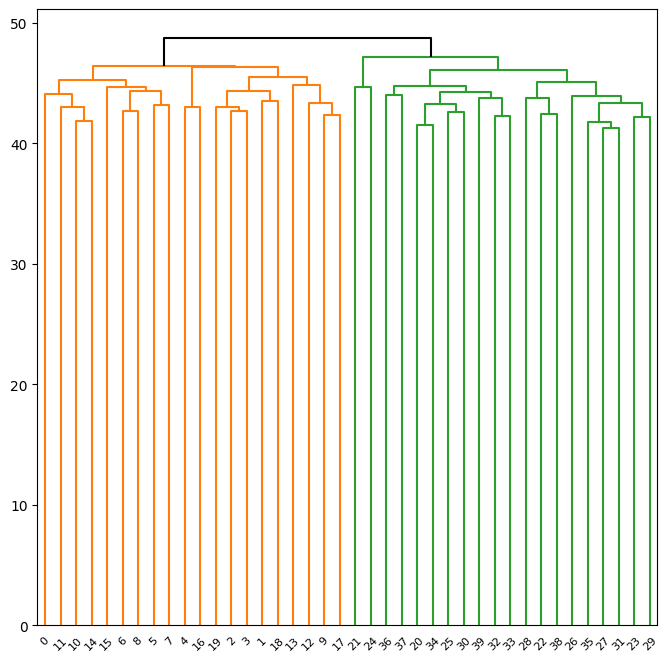

In [1015]:
linkage_comp = compute_linkage(hc_comp)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ddata = dendrogram(linkage_comp,
           ax=ax,
           color_threshold=48,
           above_threshold_color='black',
           labels=gene_df.index)

print(ddata.items().mapping['leaves_color_list'])

In [1016]:
X = ddata.items().mapping['leaves_color_list']
Y = ddata.items().mapping['leaves']

Z = [x for _,x in sorted(zip(Y,X))]
print(Z, sorted(Y))

['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2'] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [1017]:
pca = PCA()
pca.fit(gene_df)
scores = pca.transform(gene_df)
scores.shape

(40, 40)

Text(0, 0.5, 'PC2')

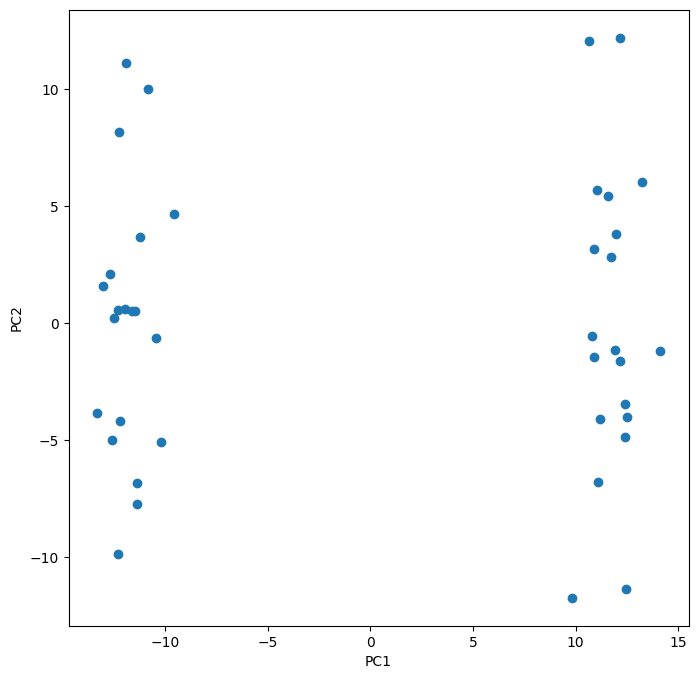

In [1018]:
i, j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))

In [1019]:
pca.components_.shape
transp = pca.components_.T # for getting the loadings on the first 2 principal components for each gene

In [1020]:
first_2_comp = transp[:, :2]
transp[:, :2].shape


(999, 2)

In [1021]:
max_mag = -1
max_mag_gene = -1
gene = 1
for i in first_2_comp:
    magnitude = math.sqrt(i[0]**2 + i[1]**2)
    if magnitude > max_mag:
        max_mag = magnitude
        max_mag_gene = gene
    gene += 1

max_mag, max_mag_gene

(0.14857218555820967, 567)

In [1022]:
first_n_genes = 20

comp_2 = first_2_comp
for j in range(first_n_genes):
    max_mag = -1
    max_mag_gene = -1
    gene = 1
    for i in comp_2:
        magnitude = math.sqrt(i[0]**2 + i[1]**2)
        if magnitude > max_mag:
            max_mag = magnitude
            max_mag_gene = gene
        gene += 1

    print(max_mag, max_mag_gene)
    comp_2 = np.delete(comp_2, (max_mag_gene-1), 0)

0.14857218555820967 567
0.12461766819409988 594
0.11585875430408463 597
0.11487415996902177 563
0.11437997435178392 548
0.11228382866633294 559
0.11147081169615594 565
0.11098403595389439 16
0.11080898183423876 564
0.11066825898217934 576
0.10954016212503764 560
0.10870947108517003 538
0.10747287199843186 500
0.1072196280841255 508
0.10655665657963591 570
0.10645476288380373 506
0.10576163162913634 583
0.10560866078148069 531
0.1050646299534171 970
0.10498542904821732 508
